<p style="font-size:14px; text-align: right">CoastWatch Python Exercises</p>  

# Compare time series from different sensors

Several ocean color sensors have been launched since 1997 to provide continuous global ocean color data. The sensors have differences in design and calibration, and different algorithms may be applied to generate chlorophyll values. Consequently, chlorophyll-a values can vary among the sensors during periods where measurements overlap. 

To examine this phenomenon, we will download and plot time-series of chlorophyll_a concentrations from various sensors from 1997 to the present and see how the measurements compare during periods of overlap. We will use data from the Seawifs (1997-2010), MODIS Aqua (2002-present) and VIIRS SNPP (2012-present) missions.

## Load the Python modules

In [25]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
np.warnings.filterwarnings('ignore')

The OceanWatch website has a data catalog containing documentation and links to all the datasets available:  
https://oceanwatch.pifsc.noaa.gov/doc.html

Navigate to the "Ocean Color" tab. From there you can access the different datasets using ERDDAP or THREDDS.

## Get monthly SeaWiFS data
### Find the data on ERDDAP
* Go to the ERDDAP operated by the CoastWatch Central Pacific Node:  
https://oceanwatch.pifsc.noaa.gov/erddap/  

* Find the monthly SeaWiFS chlorophyll dataset by putting the dataset ID (sw_chla_monthly_2018_0) in the search box. 

* Click on the "data" link. 
* Use the sliders to select the entire time range (1997-09-16T12:00:00Z to 2010-12-16T12:00:00Z)
* Set the latitude range to 0E - 40N. This dataset has a reverse order for the latitude (high to low values), so enter the higher value (40) in the first box and the lower value in the second (0)
* Set the longitude range to 198E - 208E
* Set the "File type" to ".nc" and generate the URL. 
* Copy the URL and put it into the url variable, e.g.
> url = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a%5B(1997-09-16T12:00:00Z):1:(2010-12-16T12:00:00Z)%5D%5B(40):1:(0)%5D%5B(198):1:(208)%5D'   

### Download the data using the "urllib" module (this could take a while)

In [6]:
url='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a[(1997-10-16T12:00:00Z):1:(2010-10-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]' 
urllib.request.urlretrieve(url, "sw.nc")

('sw.nc', <http.client.HTTPMessage at 0x7fefeb34aa50>)

### Use xarray to extract the data from the downloaded file and print information about the data variables.

In [7]:
sw_ds = xr.open_dataset('sw.nc',decode_cf=False)
sw_ds.data_vars

Data variables:
    chlor_a  (time, latitude, longitude) float32 ...

The downloaded data contains only one variable: chlor_a.  
    
### Compute the monthly mean over the region
* Extract the dates corresponding to each month, too

In [8]:
swAVG=np.mean(sw_ds.chlor_a,axis=(1,2)) 
swdates=nc.num2date(sw_ds.time,sw_ds.time.units) 
sw_ds.close()

## Get monthly MODIS data
### Repeat the steps above to get data for the MODIS Aqua chlorophyll dataset 
ERDDAP ID: aqua_chla_monthly_2018_0

In [26]:
url2 = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/aqua_chla_monthly_2018_0.nc?chlor_a[(2002-07-16T12:00:00Z):1:(2019-12-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]' 
urllib.request.urlretrieve(url2, "aq.nc") 
aq_ds = xr.open_dataset('aq.nc', decode_cf = False) 
aqAVG = np.mean(aq_ds.chlor_a,axis = (1,2)) 
aqdates = nc.num2date(aq_ds.time, aq_ds.time.units) 
aq_ds.close()

## Get monthly VIIRS data
### Repeat the steps above to get data for the VIIRS SNPP chlorophyll dataset
ERDDAP ID: noaa_snpp_chla_monthly

In [27]:
url3 = 'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/noaa_snpp_chla_monthly.nc?chlor_a[(2012-01-02T12:00:00Z):1:(2019-12-01T12:00:00Z)][(25):1:(15)][(198):1:(208)]' 
urllib.request.urlretrieve(url3, "snpp.nc")
snpp_ds = xr.open_dataset('snpp.nc', decode_cf=False) 
snppAVG = np.mean(snpp_ds.chlor_a, axis = (1, 2)) 
snppdates = nc.num2date(snpp_ds.time, snpp_ds.time.units) 
snpp_ds.close()

## Plot the result for three datasets 

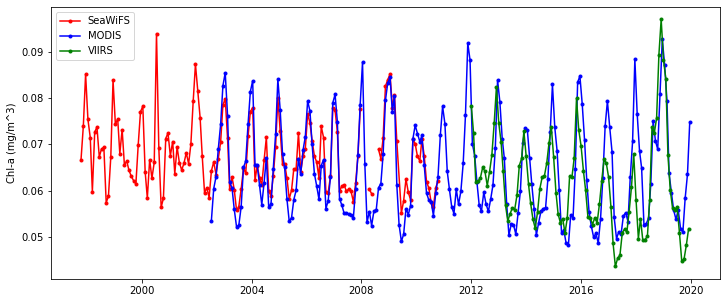

In [24]:
plt.figure(figsize = (12, 5)) 
plt.plot_date(swdates, swAVG,label='SeaWiFS', c='red', marker='.', linestyle='-') 
plt.plot_date(aqdates, aqAVG, label='MODIS', c='blue', marker='.', linestyle='-') 
plt.plot_date(snppdates, snppAVG, label='VIIRS', c='green', marker='.', linestyle='-') 
plt.ylabel('Chl-a (mg/m^3)') 
plt.legend()

## Get OC-CCI data
If you needed a single time series from 1997 to present, you would have to use the plot above to devise some method to reconcile the difference in values where two datasets overlap. Alternatively, you could use the ESA OC-CCI (ocean color climate change initiative) dataset, which blends data from many satellite missions into a single dataset, including data from SeaWiFS, MODIS, and VIIRS. 

Add the ESA OC-CCI dataset to the plot above to see how it compares with data from the individual satellite missions.  
### Repeat the steps above to get data from the ESA OC-CCI chlorophyll dataset 
ERDDAP ID: esa-cci-chla-monthly-v4-2

In [11]:
url4='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/esa-cci-chla-monthly-v4-2.nc?chlor_a[(1997-09-04):1:(2019-12-01T00:00:00Z)][(25):1:(15)][(198):1:(208)]' 
urllib.request.urlretrieve(url4, "cci.nc")
cci_ds = xr.open_dataset('cci.nc',decode_cf=False) 
cciAVG=np.mean(cci_ds.chlor_a,axis=(1,2)) 
ccidates=nc.num2date(cci_ds.time,cci_ds.time.units) 
cci_ds.close()

## Replot the result using data from all four datasets 

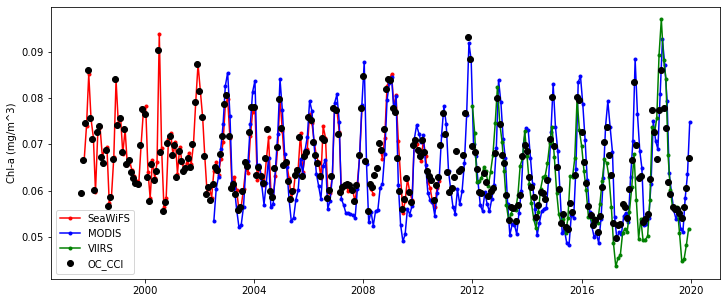

In [23]:
plt.figure(figsize=(12,5)) 
plt.plot_date(swdates, swAVG,label='SeaWiFS', c='red', marker='.', linestyle='-') 
plt.plot_date(aqdates, aqAVG, label='MODIS', c='blue', marker='.', linestyle='-') 
plt.plot_date(snppdates, snppAVG, label='VIIRS', c='green', marker='.', linestyle='-') 
plt.plot_date(ccidates, cciAVG, label='OC_CCI', c='black', marker='o') 
plt.ylabel('Chl-a (mg/m^3)') 
plt.legend()